In [1]:
from qiskit import transpile, schedule, assemble, execute
import pickle
import numpy as np
import matplotlib.pyplot as plt
from qiskit import IBMQ
from qiskit.transpiler.passes.scheduling.calibration_creators import RZXCalibrationBuilder
from qiskit.circuit import Gate
from qiskit.ignis.verification.tomography import process_tomography_circuits, ProcessTomographyFitter, TomographyFitter
from qiskit.quantum_info.operators.channel import Choi, Kraus, PTM
from qiskit.circuit import QuantumCircuit, QuantumRegister, Gate
from qiskit import transpile, schedule, assemble
from qiskit.quantum_info.operators.measures import process_fidelity
from qiskit.quantum_info import Choi, Kraus, Operator
import qiskit.quantum_info as qi

In [2]:
provider = IBMQ.load_account()

In [3]:
provider_pulse = IBMQ.get_provider(hub='ibm-q-startup', group='phasecraft-ltd', project='pulse-level-cont')
#provider_pulse = IBMQ.get_provider(hub='ibm-q-startup', group='phasecraft-ltd', project='reservations')

In [4]:
device_name = "ibmq_casablanca"
backend = provider_pulse.get_backend(device_name)

config = backend.configuration()
props = backend.properties()
defaults = backend.defaults()

calibrations = defaults.instruction_schedule_map
basis_gates = config.basis_gates
inst_map = defaults.instruction_schedule_map
#RZX_cals = RZXCalibrationBuilder(backend)

In [5]:
qpt_experiments = {}

qubit = 4

phi_angles = np.round(np.linspace(0, np.pi/2, 50), 2)#[ 0.15, 0.2, 0.25, 0.3, 0.35] #[0.025, 0.05 ,0.075]  #[0.125, 0.175, 0.225]#, 0.8] #[0.1, 0.15, 0.2, 0.25, 0.3, 0.35]# [0.4, 0.45, 0.5, 0.55, 0.6]

for phi in phi_angles:
    
    
    qregs = QuantumRegister(config.n_qubits)
    
    qc = QuantumCircuit(qregs)
    
    qc.rz(phi, (qregs[qubit]))
    
    qpt_circuits = process_tomography_circuits(qc, [qubit])
                                            
    qpt_circuits_transpiled = transpile(qpt_circuits, backend, basis_gates)
    
   
    
    qpt_experiments[str(phi)] = {'pre_transpiled_circuits': qpt_circuits,
                                   'transpiled_circuits': qpt_circuits_transpiled}

/home/laura/.local/lib/python3.9/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:465: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  prep += preparation(prep_label[j], prep_qubits[j])
/home/laura/.local/lib/python3.9/site-packages/qiskit/circuit/quantumcircuit.py:876: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)
/home/laura/.local/lib/python3.9/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:478: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circ = prep 

In [6]:
phi_angles

array([0.  , 0.03, 0.06, 0.1 , 0.13, 0.16, 0.19, 0.22, 0.26, 0.29, 0.32,
       0.35, 0.38, 0.42, 0.45, 0.48, 0.51, 0.54, 0.58, 0.61, 0.64, 0.67,
       0.71, 0.74, 0.77, 0.8 , 0.83, 0.87, 0.9 , 0.93, 0.96, 0.99, 1.03,
       1.06, 1.09, 1.12, 1.15, 1.19, 1.22, 1.25, 1.28, 1.31, 1.35, 1.38,
       1.41, 1.44, 1.47, 1.51, 1.54, 1.57])

In [7]:
qpt_experiments['0.03']['pre_transpiled_circuits'][0].draw()

░              ░         
q1_0: ─░──────────────░─────────
       ░              ░         
q1_1: ─░──────────────░─────────
       ░              ░         
q1_2: ─░──────────────░─────────
       ░              ░         
q1_3: ─░──────────────░─────────
       ░ ┌──────────┐ ░ ┌───┐┌─┐
q1_4: ─░─┤ RZ(0.03) ├─░─┤ H ├┤M├
       ░ └──────────┘ ░ └───┘└╥┘
q1_5: ─░──────────────░───────╫─
       ░              ░       ║ 
q1_6: ─░──────────────░───────╫─
       ░              ░       ║ 
c1: 1/════════════════════════╩═
                              0

In [8]:
qpt_experiments['0.03']['transpiled_circuits'][0].draw()

global phase: π/4
           ░              ░                                
q1_0 -> 0 ─░──────────────░────────────────────────────────
           ░              ░                                
q1_1 -> 1 ─░──────────────░────────────────────────────────
           ░              ░                                
q1_2 -> 2 ─░──────────────░────────────────────────────────
           ░              ░                                
q1_3 -> 3 ─░──────────────░────────────────────────────────
           ░ ┌──────────┐ ░ ┌─────────┐┌────┐┌─────────┐┌─┐
q1_4 -> 4 ─░─┤ RZ(0.03) ├─░─┤ RZ(π/2) ├┤ √X ├┤ RZ(π/2) ├┤M├
           ░ └──────────┘ ░ └─────────┘└────┘└─────────┘└╥┘
q1_5 -> 5 ─░──────────────░──────────────────────────────╫─
           ░              ░                              ║ 
q1_6 -> 6 ─░──────────────░──────────────────────────────╫─
           ░              ░                              ║ 
    c1: 1/═══════════════════════════════════════════════╩═
                                                         0

In [9]:
results = {}

label ='22.June'
for phi in phi_angles:
    
    print(phi)
    
    qpt_exp = qpt_experiments[str(phi)]['transpiled_circuits']
    job = execute(qpt_exp, backend=backend, shots=100)#,mode='dedicated')
    result = job.result()
    
    results[f'{phi}'] = result
    
    with open(f'results/{device_name}/{label}/1qtomo/{phi}.q4.pickle', 'wb') as handle:
        pickle.dump(result, handle, protocol=pickle.HIGHEST_PROTOCOL)

0.0
0.03
0.06
0.1
0.13
0.16
0.19
0.22
0.26
0.29
0.32
0.35
0.38
0.42
0.45
0.48
0.51
0.54
0.58
0.61
0.64
0.67
0.71
0.74
0.77
0.8
0.83
0.87
0.9
0.93
0.96
0.99
1.03
1.06
1.09
1.12
1.15
1.19
1.22
1.25


KeyboardInterrupt: 

In [10]:
with open(f'results/{device_name}/{label}/1qtomo/full_results.q4.pickle', 'wb') as handle:
        pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
fidelities = {}
q2 = QuantumRegister(1)

for phi in phi_angles:
    
    phi = float(phi)
    
    qpt_circuits = qpt_experiments[str(phi)]['transpiled_circuits']
    
   
    res = results[str(phi)]
    
    process_data = ProcessTomographyFitter(res, qpt_circuits, meas_basis='Pauli', prep_basis='Pauli')
   
    
    choi_fit = process_data.fit( )#method='cvx', standard_weights=True,kwargs={ "trace_preserving":True, "PSD": True})

    choi_fit = choi_fit.data
    
   
    ideal_circ = QuantumCircuit(q2)
    
    ideal_circ.rz( phi,q2[0])
    
    
    
    ideal_op_data = qi.Operator(ideal_circ).data
        
 
    fid = qi.process_fidelity(channel=Choi(choi_fit),target=qi.Operator(ideal_op_data)) 
  
    fidelities[str(phi)] = fid

Input channel is not TP. Tr_2[Choi] - I has non-zero eigenvalues: [-3.60446096e-06  1.19442254e-06]
Input channel is not TP. Tr_2[Choi] - I has non-zero eigenvalues: [-0.00014603  0.00017186]
Input channel is not CP. Choi-matrix has negative eigenvalues: [-2.00251701e-05]
Input channel is not TP. Tr_2[Choi] - I has non-zero eigenvalues: [-0.00012709  0.00017787]
Input channel is not CP. Choi-matrix has negative eigenvalues: [-1.98330494e-05]
Input channel is not TP. Tr_2[Choi] - I has non-zero eigenvalues: [-3.92312502e-05  4.92444003e-05]
Input channel is not TP. Tr_2[Choi] - I has non-zero eigenvalues: [-8.15965651e-05  1.03689190e-04]
Input channel is not CP. Choi-matrix has negative eigenvalues: [-4.17887018e-05]
Input channel is not TP. Tr_2[Choi] - I has non-zero eigenvalues: [-2.61356855e-05  4.53719856e-05]
Input channel is not CP. Choi-matrix has negative eigenvalues: [-6.07822815e-05]
Input channel is not TP. Tr_2[Choi] - I has non-zero eigenvalues: [-2.05747759e-05  4.835710

KeyError: '1.25'

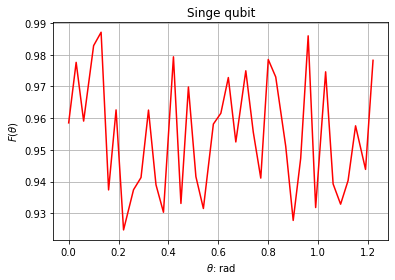

In [12]:
keys4 = sorted(fidelities.keys())
plt.plot([float(k) for k in keys4],[fidelities[k] for k in keys4],c='r')
plt.xlabel(r'$\theta$: rad')
plt.ylabel(r'$F(\theta)$')
plt.title(r'Singe qubit')
plt.grid()